Stellar Populations: Intro to Probability and Stats 

Problem 2:

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pdb

In [2]:
def lnposterior(mu, sigma, x):
    """
    define the posterior function P(theta|Data)
    here it is a gaussian distribution with given mu and sigma"""
    P = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-(x-mu)**2/(2*sigma**2))
    return np.log(P)

In [3]:
def proposal(theta_now, step_size):
    """
    define proposal density distribution P(theta_i+1|theta_i)
    I use a gaussian distribution centered at theta_i, with sigma = step_size
    """
    theta_next = np.random.normal(theta_now, step_size)
    return theta_next

In [4]:
def MH_MCMC(mu, sigma, theta0, steps, step_size):
    """
    derive sample based on posterior using Metropolis-Hastings MCMC
    Input:
        mu, sigma: determines posterior
        theta0: starting point
        steps: how many steps in the chain
        step_size: size from theta_i to theta_i+1, goes into proposal
    Output:
        theta: sampling parameters
        lnP: ln posterior for theta
        accept: acceptance fraction
    """
    # initialize model paramters theta, lnP, acceptance
    theta = np.zeros(steps)
    lnP = np.zeros(steps)
    accept = 0
    theta[0] = theta0
    lnP[0] = lnposterior(mu, sigma, theta0)
    
    # loop through steps
    for i in range(steps-1):
        theta[i+1] = proposal(theta[i], step_size)
        lnP[i+1] = lnposterior(mu, sigma, theta[i+1])
        alpha = np.exp(lnP[i+1] - lnP[i])
        accept += 1
        if alpha < np.random.random():
            theta[i+1] = theta[i]
            lnP[i+1] = lnP[i]
            accept -= 1
    return theta, lnP, accept/steps

acceptance fraction is 0.37


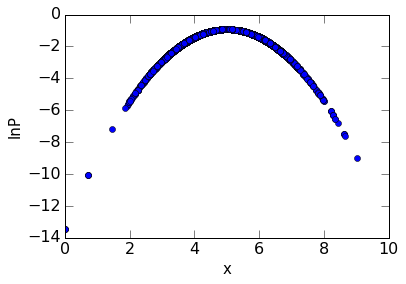

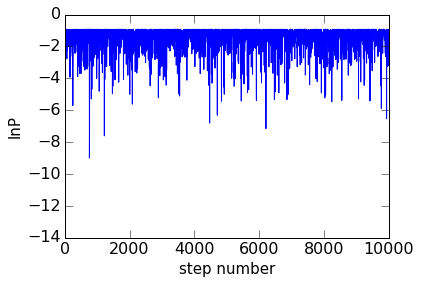

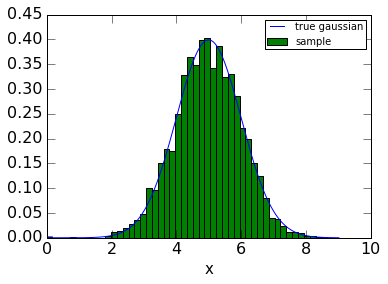

In [45]:
# test MH MCMC sampler, using one dimensinal Gaussian distribution ~(5, 1)
mu = 5
sigma = 1
theta0 = 0
steps = 10000
step_size = 3
theta, lnP, acc = MH_MCMC(mu, sigma, theta0, steps, step_size)

# make diagnostic plots
print("acceptance fraction is %.2f" %acc)
# lnP vs x
plt.figure()
plt.plot(theta, lnP, 'o')
plt.xlabel('x')
plt.ylabel('lnP')
plt.savefig('2_p_x.png', format='png')
# lnP vs stepnumber
plt.figure()
plt.plot(lnP)
plt.xlabel('step number')
plt.ylabel('lnP')
plt.savefig('2_p_step.png', format='png')
# samples relative to true distribution
theta_range = np.linspace(theta.min(), theta.max(), 10000)
plt.figure()
nbins=50
plt.plot(theta_range, np.exp(lnposterior(mu, sigma,theta_range)), label='true gaussian')
plt.hist(theta, bins=nbins,label='sample', normed=True)
plt.xlabel('x')
plt.legend(prop={'size':10})
plt.savefig('2_sample.png', format='png')